## Bayesian Modeling ##

In [2]:
import os
import sys
import importlib
from pathlib import Path
import pandas as pd
import numpy as np
import joblib

In [12]:
# 获取项目根目录
project_root = Path(os.getcwd()).parent
sys.path.append(str(project_root))

# 导入分割方法
import src.Bayesian.utils.partition as partition
importlib.reload(partition)
from src.Bayesian.utils.partition import Partition

partition = Partition()
all_centers = {
    '2_cats': partition.get_centers(4, 2),
    '4_cats': partition.get_centers(4, 4)
}

# 导入数据
processed_path = Path(project_root) / 'data' / 'processed'
learning_data = pd.read_csv(processed_path / 'Task2_processed.csv')

### 1. Base/ rational ###

In [13]:
# 导入基线模型
import src.Bayesian.M_base as model_base
importlib.reload(model_base)
from src.Bayesian.M_base import M_Base

import src.Bayesian.config as config
importlib.reload(config)
from src.Bayesian.config import config_base
model_base = M_Base(config_base)

model_base.set_centers(all_centers)

In [14]:
# 模型拟合
fitting_results = {}
for iSub, subject_data in learning_data.groupby('iSub'):
    step_results = model_base.fit_trial_by_trial(subject_data)
    fitting_results[iSub] = {
        'condition': subject_data['condition'].iloc[0],
        'step_results': step_results
    }

In [15]:
# 保存拟合结果
result_path = Path(project_root) / 'results' / 'Bayesian'
os.makedirs(result_path, exist_ok=True)

filename = f'M_Base_fitting_results.joblib'
joblib.dump(fitting_results, result_path / filename)

['/home/yangjiong/CategoryLearning/results/Bayesian/M_Base_fitting_results.joblib']

In [8]:
# 导入模型分析
import src.Bayesian.utils.model_evaluation as model_eval
importlib.reload(model_eval)
from src.Bayesian.utils.model_evaluation import ModelEval

model_eval = ModelEval()

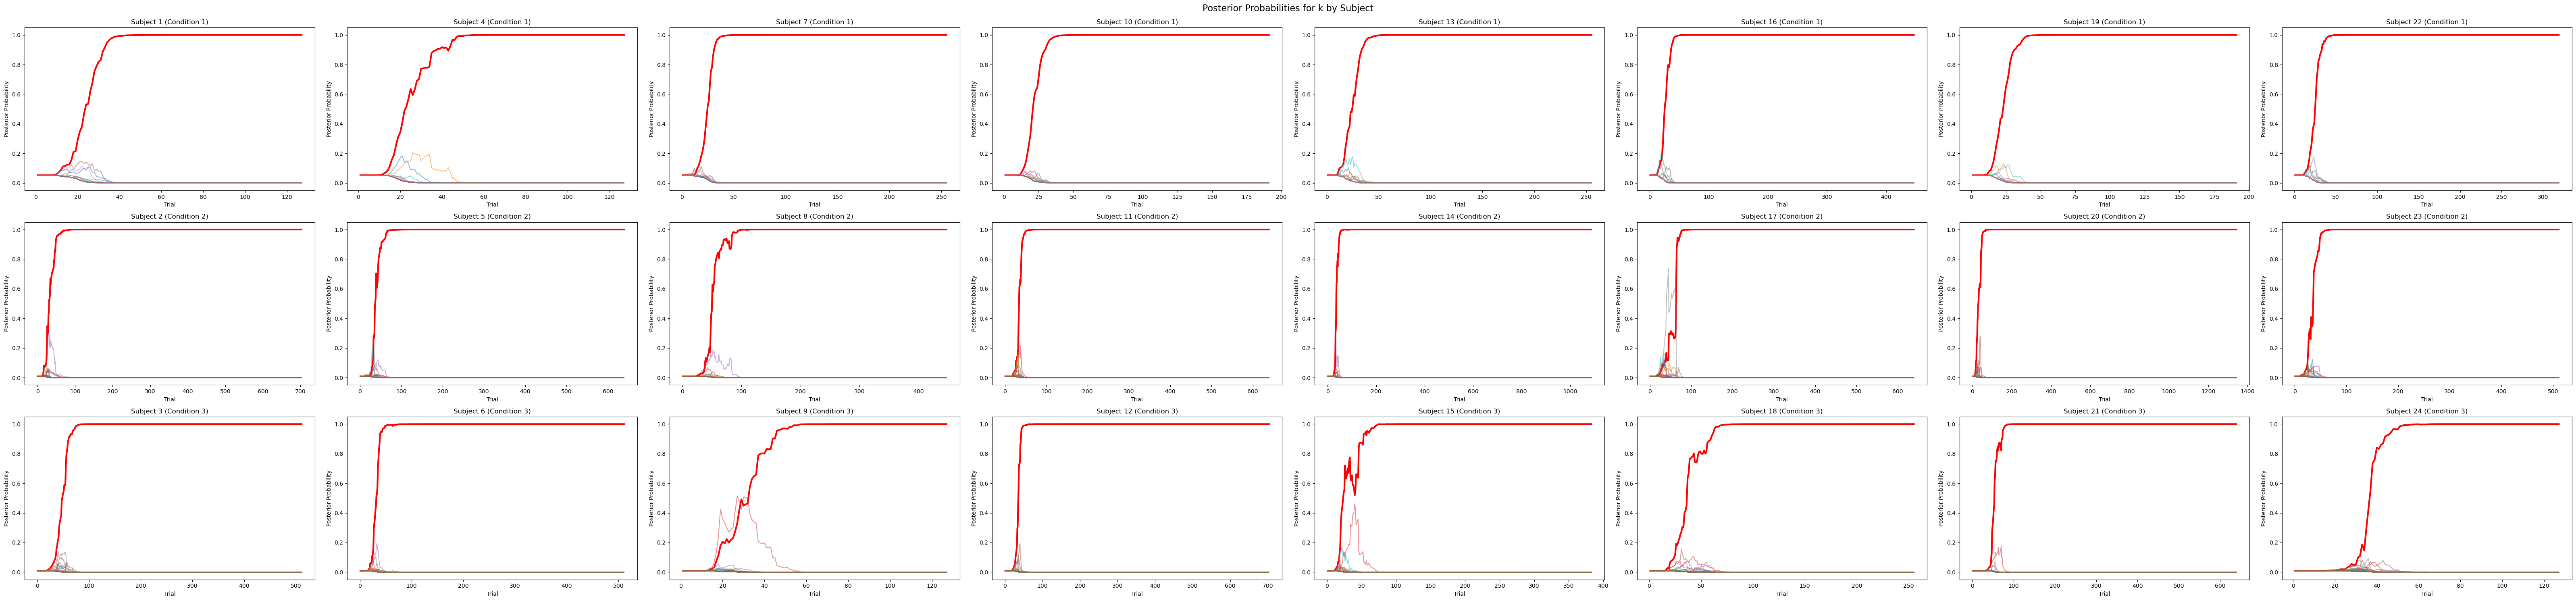

In [16]:
# 加载拟合结果
fitting_results = joblib.load(result_path / 'M_Base_fitting_results.joblib')

# 绘制最优参数变化图
model_eval.plot_params_over_trials(fitting_results, 'beta', result_path / f'M_Base_beta.png')

# 绘制k后验概率变化图
model_eval.plot_posterior_probabilities(fitting_results, result_path / f'M_Base_posteriors.png')

# 计算预测准确率
predictive_results = {}
for iSub, fit_result in fitting_results.items():
    subject_data = learning_data[learning_data['iSub'] == iSub]
    step_results = fit_result['step_results']
    condition = fit_result['condition']
    
    predictions = model_eval.calculate_predictions(model_base, subject_data, step_results)
    sliding_accuracy = model_eval.calculate_sliding_accuracy(predictions)
    
    predictive_results[iSub] = {
        'condition': condition,
        'step_results': step_results,
        'predictions': predictions,
        'sliding_accuracy': sliding_accuracy
    }

# 绘制预测准确率变化图
filename = f'M_Base_predictive_accuracy.png'
model_eval.plot_predictive_accuracy(predictive_results, result_path / filename)

### 2. + Forgetting ###

In [41]:
# 导入模型
import src.Bayesian.M_fgt as model_forget
importlib.reload(model_forget)
from src.Bayesian.M_fgt import M_Fgt

import src.Bayesian.config as config
importlib.reload(config)
from src.Bayesian.config import config_fgt
model_forget = M_Fgt(config_fgt)

model_forget.set_centers(all_centers)

In [ ]:
fitting_results = {}
for iSub, subject_data in learning_data.groupby('iSub'):
    step_results = model_forget.fit_trial_by_trial(subject_data)
    fitting_results[iSub] = {
        'condition': subject_data['condition'].iloc[0],
        'step_results': step_results
    }

In [27]:
# 保存拟合结果
result_path = Path(project_root) / 'results' / 'Bayesian'
os.makedirs(result_path, exist_ok=True)

filename = f'M_Fgt_fitting_results.joblib'
joblib.dump(fitting_results, result_path / filename)

['/home/yangjiong/CategoryLearning/results/Bayesian/M_Fgt_fitting_results.joblib']

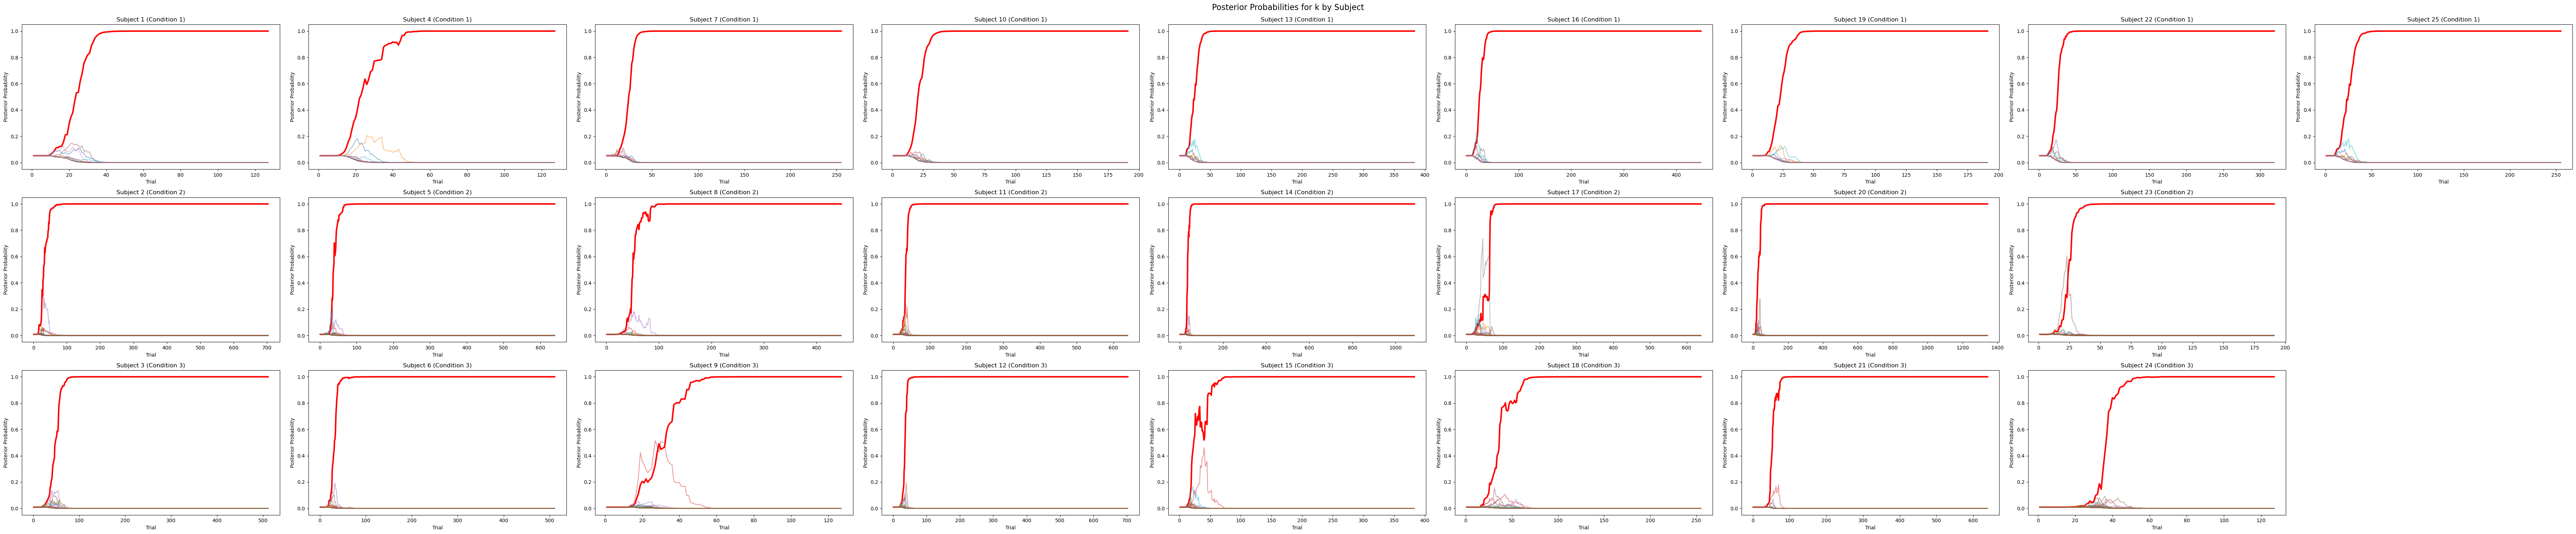

In [28]:
# 加载拟合结果
fitting_results = joblib.load(result_path / 'M_Fgt_fitting_results.joblib')

# 绘制后验概率变化图
filename = f'M_Fgt_posteriors.png'
model_eval.plot_posterior_probabilities(fitting_results, result_path / filename)

# 计算预测准确率
predictive_results = {}
for iSub, fit_result in fitting_results.items():
    try:
        subject_data = learning_data[learning_data['iSub'] == iSub]
        step_results = fit_result['step_results']
        condition = fit_result['condition']
        
        predictions = model_eval.calculate_predictions(model_forget, subject_data, step_results)
        sliding_accuracy = model_eval.calculate_sliding_accuracy(predictions)
        
        predictive_results[iSub] = {
            'condition': condition,
            'step_results': step_results,
            'predictions': predictions,
            'sliding_accuracy': sliding_accuracy
        }
    except Exception as e:
        print(f"Error processing predictions for subject {iSub}: {str(e)}")
        continue

# 绘制预测准确率变化图
filename = f'M_Fgt_predictive_accuracy.png'
model_eval.plot_predictive_accuracy(predictive_results, result_path / filename)

### 3. + Decision Noise ###

In [22]:
# 导入模型
import src.Bayesian.M_dec as model_decision
importlib.reload(model_decision)
from src.Bayesian.M_dec import M_Dec

import src.Bayesian.config as config
importlib.reload(config)
from src.Bayesian.config import config_dec
model_decision = M_Dec(config_dec)

model_decision.set_centers(all_centers)

In [18]:
# 模型拟合
fitting_results = {}
for iSub, subject_data in learning_data.groupby('iSub'):
    step_results = model_decision.fit_trial_by_trial(subject_data)
    fitting_results[iSub] = {
        'condition': subject_data['condition'].iloc[0],
        'step_results': step_results
    }

In [19]:
# 保存拟合结果
result_path = Path(project_root) / 'results' / 'Bayesian'
os.makedirs(result_path, exist_ok=True)

filename = f'M_Dec_fitting_results.joblib'
joblib.dump(fitting_results, result_path / filename)

['/home/yangjiong/CategoryLearning/results/Bayesian/M_Dec_fitting_results.joblib']

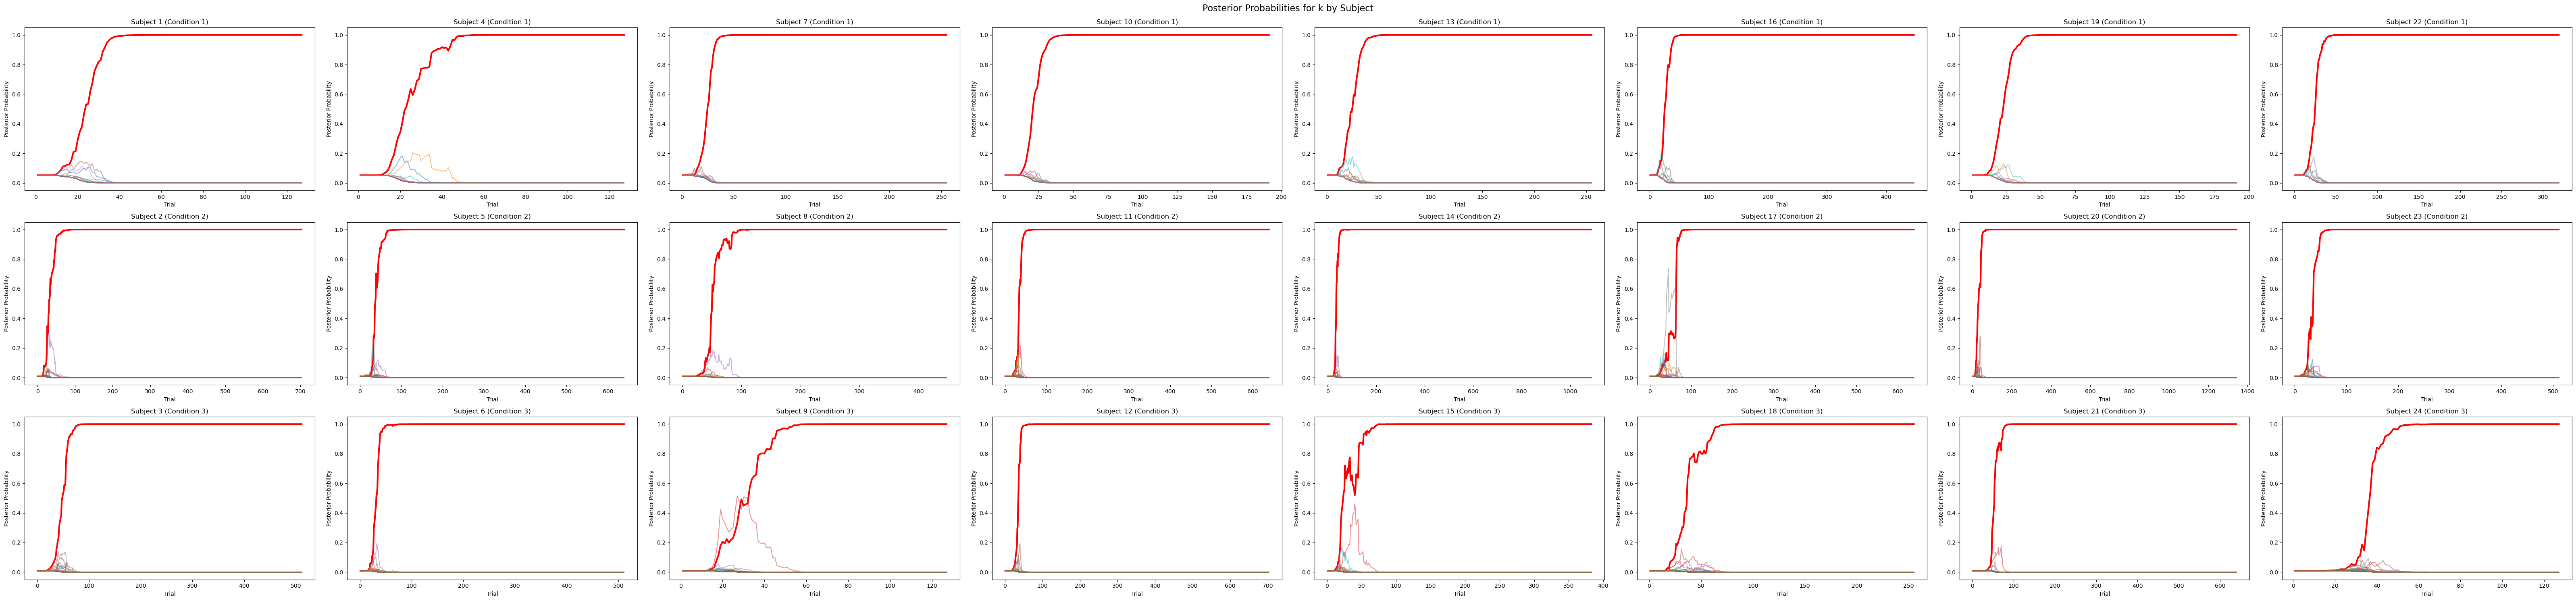

In [21]:
# 加载拟合结果
fitting_results = joblib.load(result_path / 'M_Dec_fitting_results.joblib')

# 绘制最优参数变化图
model_eval.plot_params_over_trials(fitting_results, 'beta', result_path / f'M_Dec_beta.png')
model_eval.plot_params_over_trials(fitting_results, 'phi', result_path / f'M_Dec_phi.png')

# 绘制k的后验概率变化图
model_eval.plot_posterior_probabilities(fitting_results, result_path / f'M_Dec_posteriors.png')

# 计算预测准确率
predictive_results = {}
for iSub, fit_result in fitting_results.items():
    try:
        subject_data = learning_data[learning_data['iSub'] == iSub]
        step_results = fit_result['step_results']
        condition = fit_result['condition']
        
        predictions = model_eval.calculate_predictions(model_decision, subject_data, step_results)
        sliding_accuracy = model_eval.calculate_sliding_accuracy(predictions)
        
        predictive_results[iSub] = {
            'condition': condition,
            'step_results': step_results,
            'predictions': predictions,
            'sliding_accuracy': sliding_accuracy
        }
    except Exception as e:
        print(f"Error processing predictions for subject {iSub}: {str(e)}")
        continue

# 绘制预测准确率变化图
filename = f'M_Dec_predictive_accuracy.png'
model_eval.plot_predictive_accuracy(predictive_results, result_path / filename)

### 4. + Perceptive Noise ###

In [4]:
learning_data = pd.read_csv(processed_path / 'Task2_processed_perceived.csv')

In [5]:
# 导入基线模型
import src.Bayesian.M_base as model_base
importlib.reload(model_base)
from src.Bayesian.M_base import M_Base

import src.Bayesian.config as config
importlib.reload(config)
from src.Bayesian.config import config_base
model_base = M_Base(config_base)

model_base.set_centers(all_centers)

/home/yangjiong/.conda/envs/bayes/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
# 模型拟合
fitting_results = {}
for iSub, subject_data in learning_data.groupby('iSub'):
    step_results = model_base.fit_trial_by_trial(subject_data)
    fitting_results[iSub] = {
        'condition': subject_data['condition'].iloc[0],
        'step_results': step_results
    }

In [7]:
# 保存拟合结果
result_path = Path(project_root) / 'results' / 'Bayesian'
os.makedirs(result_path, exist_ok=True)

filename = f'M_Perc_fitting_results.joblib'
joblib.dump(fitting_results, result_path / filename)

['/home/yangjiong/CategoryLearning/results/Bayesian/M_Perc_fitting_results.joblib']

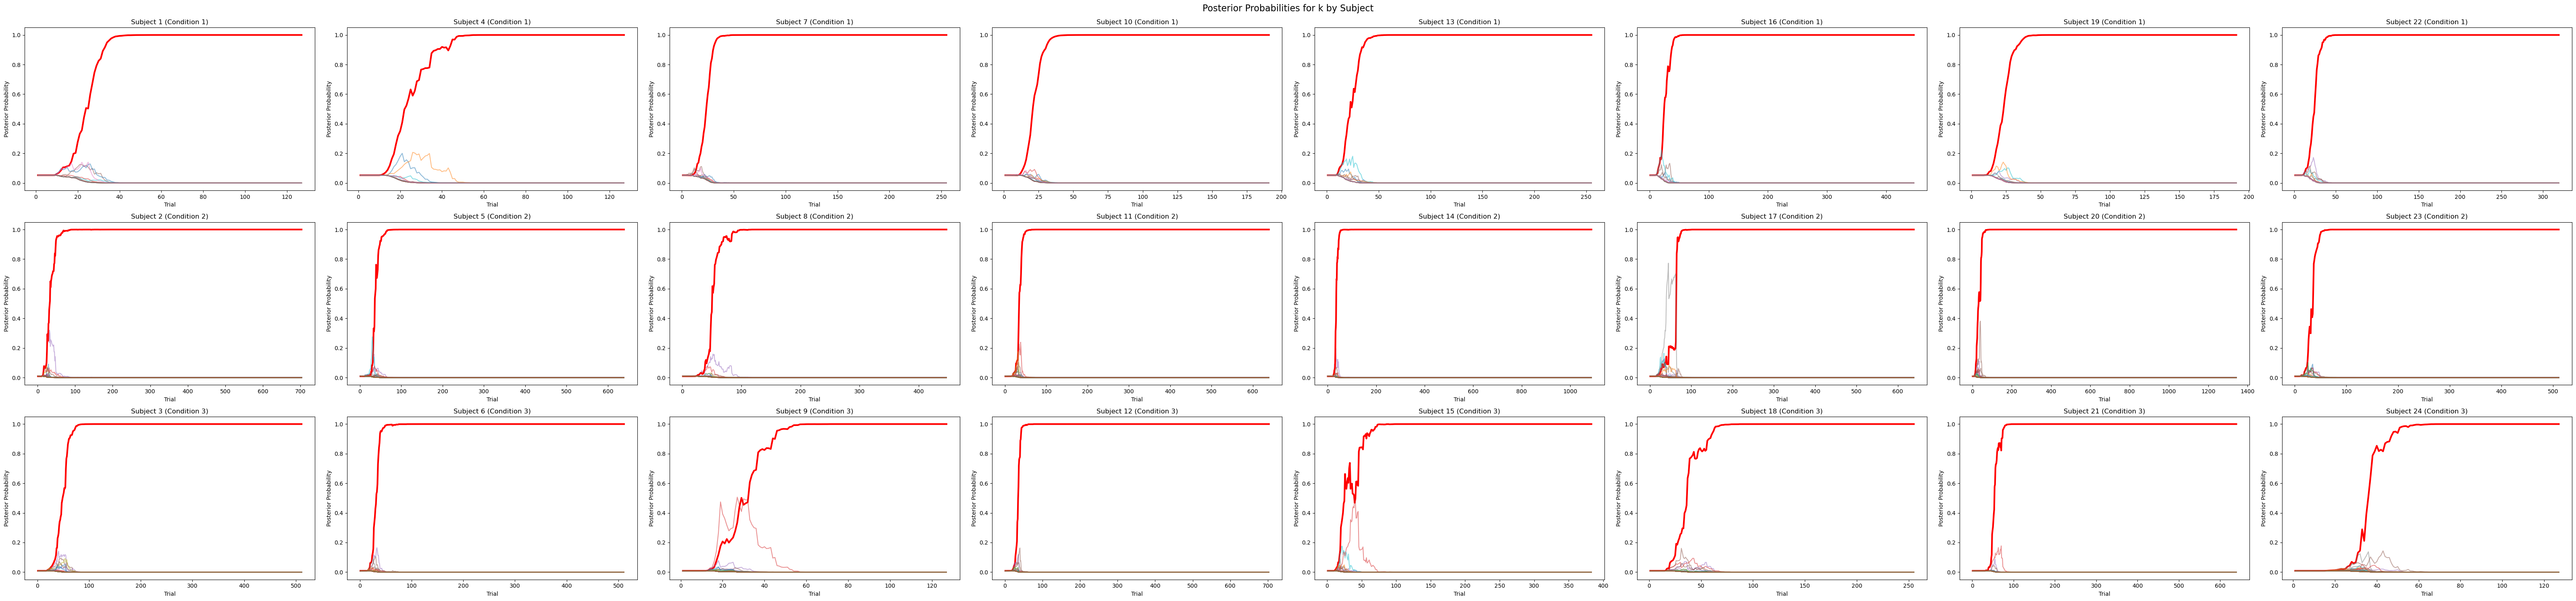

In [9]:
# 加载拟合结果
fitting_results = joblib.load(result_path / 'M_Perc_fitting_results.joblib')

# 绘制最优参数变化图
model_eval.plot_params_over_trials(fitting_results, 'beta', result_path / f'M_Perc_beta.png')

# 绘制k后验概率变化图
model_eval.plot_posterior_probabilities(fitting_results, result_path / f'M_Perc_posteriors.png')

# 计算预测准确率
predictive_results = {}
for iSub, fit_result in fitting_results.items():
    subject_data = learning_data[learning_data['iSub'] == iSub]
    step_results = fit_result['step_results']
    condition = fit_result['condition']
    
    predictions = model_eval.calculate_predictions(model_base, subject_data, step_results)
    sliding_accuracy = model_eval.calculate_sliding_accuracy(predictions)
    
    predictive_results[iSub] = {
        'condition': condition,
        'step_results': step_results,
        'predictions': predictions,
        'sliding_accuracy': sliding_accuracy
    }

# 绘制预测准确率变化图
filename = f'M_Perc_predictive_accuracy.png'
model_eval.plot_predictive_accuracy(predictive_results, result_path / filename)

### 5. + Attention Weight ###

In [ ]:
# 导入基线模型
import src.Bayesian.M_base as model_base
importlib.reload(model_base)
from src.Bayesian.M_base import M_Base

import src.Bayesian.config as config
importlib.reload(config)
from src.Bayesian.config import config_base
model_base = M_Base(config_base)

model_base.set_centers(all_centers)

### 6. Full ###